In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import time
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [19]:
train_all = pd.read_csv('train.csv')
test_all = pd.read_csv('test.csv')

In [20]:
train_data, valid_data = train_test_split(train_all, test_size=0.2, random_state=42)

In [40]:
train_X, train_y = train_data.drop(['failure'], axis=1), train_data['failure']
valid_X, valid_y = valid_data.drop(['failure'], axis=1), valid_data['failure']
valid_y

24141    0
10658    0
4745     0
16564    1
9636     0
        ..
5354     0
22096    0
24668    1
24234    0
21844    0
Name: failure, Length: 5314, dtype: int64

# どの特徴が故障に影響しやすいのかを分析する

<Figure size 432x288 with 0 Axes>

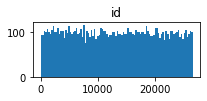

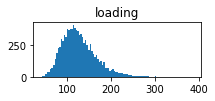

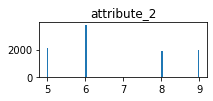

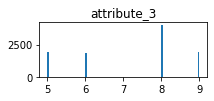

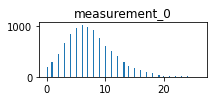

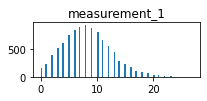

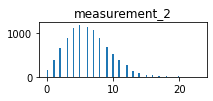

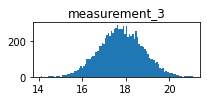

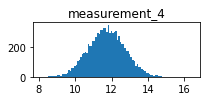

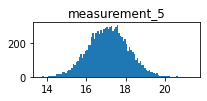

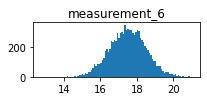

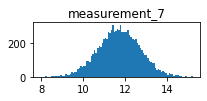

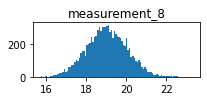

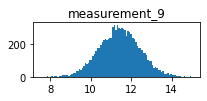

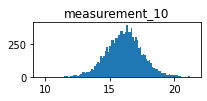

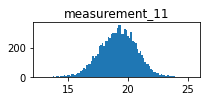

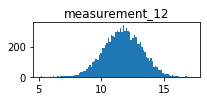

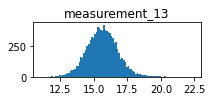

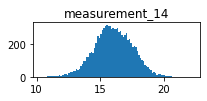

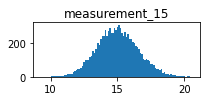

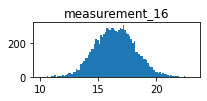

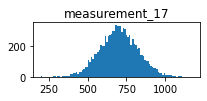

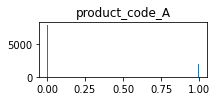

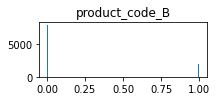

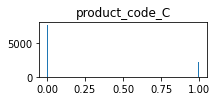

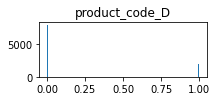

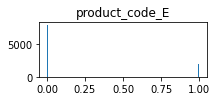

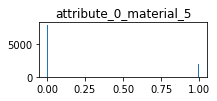

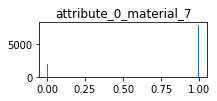

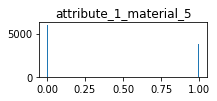

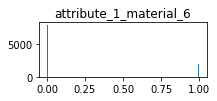

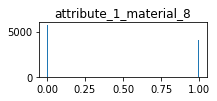

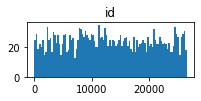

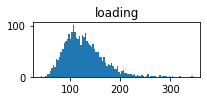

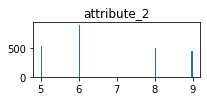

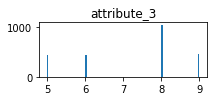

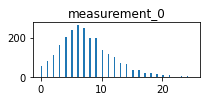

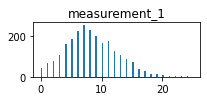

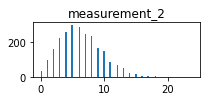

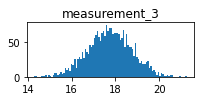

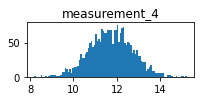

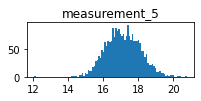

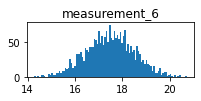

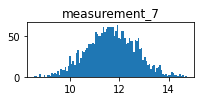

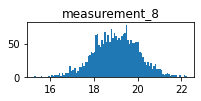

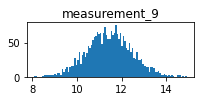

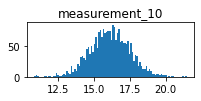

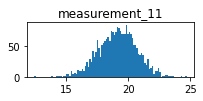

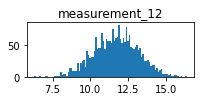

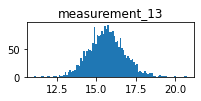

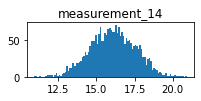

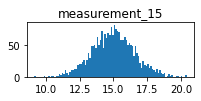

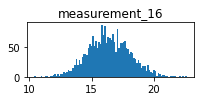

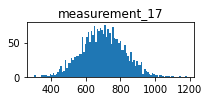

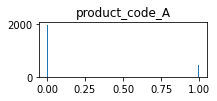

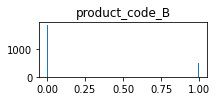

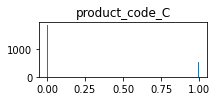

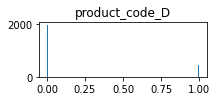

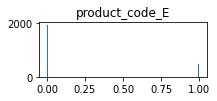

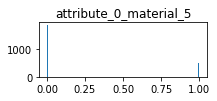

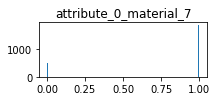

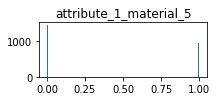

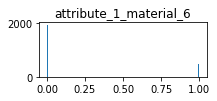

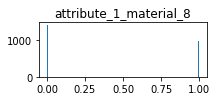

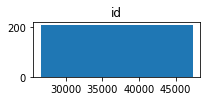

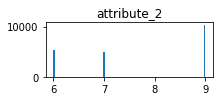

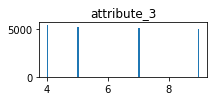

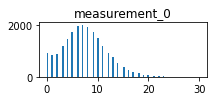

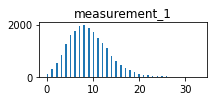

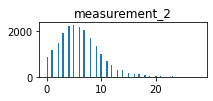

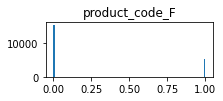

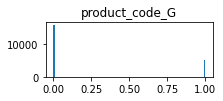

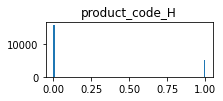

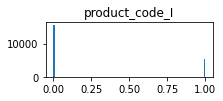

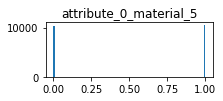

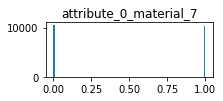

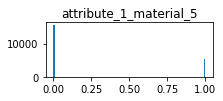

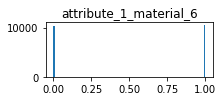

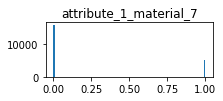

In [60]:
# 各特徴慮のヒストグラムを確認
datasets = [train_X, valid_X, test_all]

plt.figure(figsize=(6, 4))
for dataset in datasets:
    for col in dataset.columns:
        plt.figure(figsize=(3, 1))
        plt.title(col)
        plt.hist(dataset[col], bins=100)
        plt.show()
        plt.close()

In [44]:
#missing data
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data["Total"]>0]

,Total,Percent
measurement_17,1837,0.086423
measurement_16,1699,0.079930
measurement_15,1623,0.076355
measurement_14,1496,0.070380
measurement_13,1401,0.065911
measurement_12,1315,0.061865
measurement_11,1153,0.054244
measurement_10,1042,0.049021
measurement_9,972,0.045728
measurement_8,852,0.040083


In [52]:

for dataset in datasets:
  dataset.dropna(inplace=True)
  # for col in dataset.columns:
  #   if dataset[col].isnull().sum()>0:
  #     dataset.drop(col, axis=1, inplace=True)
      # dataset[col].fillna(dataset[col].mean(), inplace=True)
#missing data
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data["Total"]>0]

,Total,Percent


In [67]:
# カテゴリ変数を数値変数に変換

train_X = pd.get_dummies(train_X)
valid_X = pd.get_dummies(valid_X)
test_all = pd.get_dummies(test_all)


In [70]:
train_X = train_X.drop(["id"], axis=1)
valid_X = valid_X.drop(["id"], axis=1)
test_data = test_all.drop(["id"], axis=1)

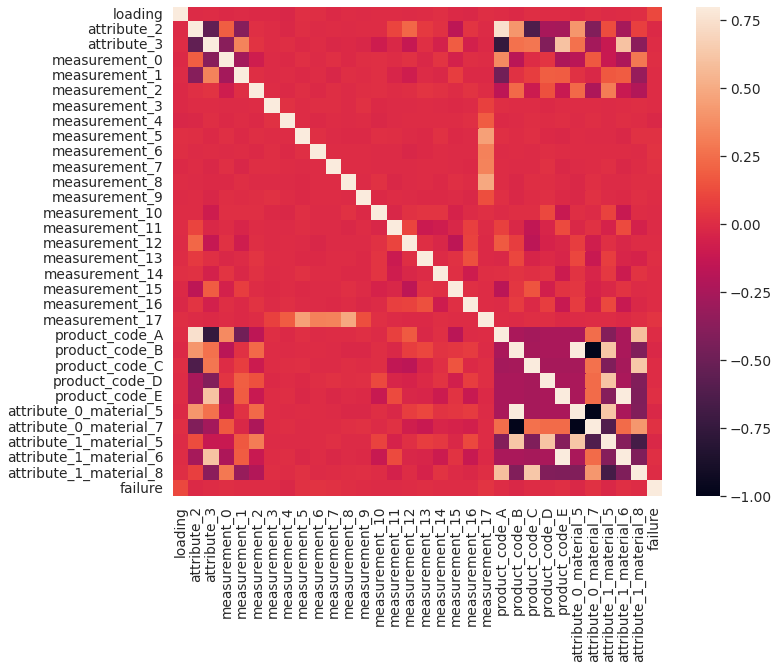

In [71]:
#correlation matrix
tmp = pd.concat([train_X, train_y], axis=1)
corrmat = tmp.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [75]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9781 entries, 13904 to 23654
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loading                 9781 non-null   float64
 1   attribute_2             9781 non-null   int64  
 2   attribute_3             9781 non-null   int64  
 3   measurement_0           9781 non-null   int64  
 4   measurement_1           9781 non-null   int64  
 5   measurement_2           9781 non-null   int64  
 6   measurement_3           9781 non-null   float64
 7   measurement_4           9781 non-null   float64
 8   measurement_5           9781 non-null   float64
 9   measurement_6           9781 non-null   float64
 10  measurement_7           9781 non-null   float64
 11  measurement_8           9781 non-null   float64
 12  measurement_9           9781 non-null   float64
 13  measurement_10          9781 non-null   float64
 14  measurement_11          9781 non-nu

In [78]:
train_y

4031     0
2375     0
13904    0
18772    0
3884     1
        ..
21575    1
5390     1
860      0
15795    0
23654    0
Name: failure, Length: 21256, dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

lr_model = LogisticRegression()

lr_model.fit(train_X, train_y)


ValueError: Found input variables with inconsistent numbers of samples: [9781, 21256]

In [ ]:
predictions = lr_model.predict(valid_X)